<a href="https://colab.research.google.com/github/sumanssamui/HEart-Failure-PRediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

**Importing and Reading the dataset**


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = "/content/drive/MyDrive/heart.csv"
df = pd.read_csv(path)
df.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

In [6]:
df.shape

(918, 12)

In [7]:
df.keys()

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [39]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

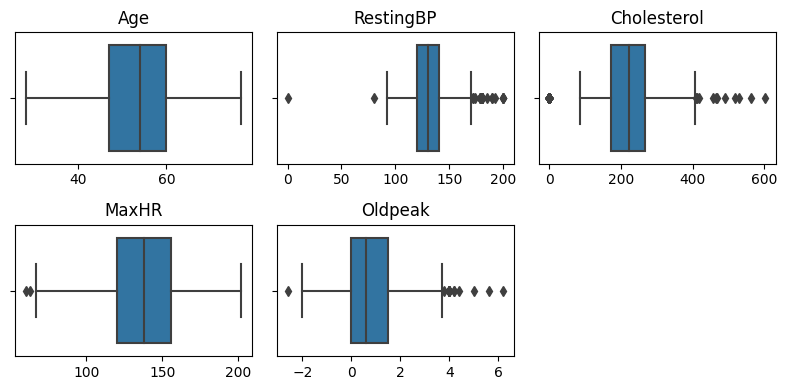

In [40]:
# List of variables to include in the boxplot
cont_var = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
df1 = df[cont_var]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(8, 4))
axes = axes.flatten()

# Create a boxplot for each continuous variable
for i, column in enumerate(df1.columns):
    sns.boxplot(data=df1, x=column, ax=axes[i])
    axes[i].set_title(f"{column}")
    axes[i].set_xlabel("")  # Remove x-axis title

# Remove empty subplot
for i in range(len(df1.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [41]:
# Remove outlier using IQR method

# Copy df for modification
df2 = df.copy()

# Iterate over continuous features only
for col in ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]:

    # Calculate Q1, Q3 & IQR
    q1 = df2[col].quantile(0.25)
    q3 = df2[col].quantile(0.75)
    iqr = q3 - q1

    # Define the lower bound and upper bound
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f"{col}: lower bound is {round(lower_bound, 3)}, upper bound is {round(upper_bound, 3)}")

    # Remove outliers by filtering based on lower & upper bounds
    df2 = df2[(df2[col] >= lower_bound) & (df2[col] <= upper_bound)]

Age: lower bound is 27.5, upper bound is 79.5
RestingBP: lower bound is 90.0, upper bound is 170.0
Cholesterol: lower bound is 37.0, upper bound is 403.0
MaxHR: lower bound is 65.0, upper bound is 217.0
Oldpeak: lower bound is -2.25, upper bound is 3.75


In [42]:
# check no of row removed under outlier removal
row_rm = df.shape[0] - df2.shape[0]
print(f"rows removed: {row_rm}")

rows removed: 217


In [43]:
# Set df2 (cleaned) to df (original)
df = df2

In [45]:
# confirm unique value of string object
for col in df.columns:
    if df[col].dtype == 'object':
        value_counts = df[col].value_counts()
        print(f"'{col}':\n{value_counts}\n")

'Sex':
M    533
F    168
Name: Sex, dtype: int64

'ChestPainType':
ASY    339
NAP    163
ATA    160
TA      39
Name: ChestPainType, dtype: int64

'RestingECG':
Normal    421
LVH       165
ST        115
Name: RestingECG, dtype: int64

'ExerciseAngina':
N    439
Y    262
Name: ExerciseAngina, dtype: int64

'ST_Slope':
Up      338
Flat    331
Down     32
Name: ST_Slope, dtype: int64



In [46]:
# Label encoding for string object
label_encoder = preprocessing.LabelEncoder()

for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    if col in df.columns:
        df[col]= label_encoder.fit_transform(df[col])
        print(f"'{col}':\n{df[col].value_counts()}\n")

'Sex':
1    533
0    168
Name: Sex, dtype: int64

'ChestPainType':
0    339
2    163
1    160
3     39
Name: ChestPainType, dtype: int64

'RestingECG':
1    421
0    165
2    115
Name: RestingECG, dtype: int64

'ExerciseAngina':
0    439
1    262
Name: ExerciseAngina, dtype: int64

'ST_Slope':
2    338
1    331
0     32
Name: ST_Slope, dtype: int64



In [47]:
# confirm datatype after encode
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             701 non-null    int64  
 1   Sex             701 non-null    int64  
 2   ChestPainType   701 non-null    int64  
 3   RestingBP       701 non-null    int64  
 4   Cholesterol     701 non-null    int64  
 5   FastingBS       701 non-null    int64  
 6   RestingECG      701 non-null    int64  
 7   MaxHR           701 non-null    int64  
 8   ExerciseAngina  701 non-null    int64  
 9   Oldpeak         701 non-null    float64
 10  ST_Slope        701 non-null    int64  
 11  HeartDisease    701 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 71.2 KB


**Data Splitting**

In [48]:
df_features = df.drop(['HeartDisease'], axis=1)
df_target = df['HeartDisease']

# split df at 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=123)

In [49]:
# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit and transform the train_set & test_set, features only
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [50]:
scaled_X_train = pd.DataFrame(scaled_X_train, columns = X_train.columns, index=X_train.index)
scaled_X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
65,-1.645413,-1.837117,0.156134,-0.744300,0.437775,-0.464630,0.158074,-0.425003,-0.785596,-0.851700,0.968338
36,1.311374,0.544331,-0.891887,0.588693,1.343543,2.152251,0.158074,-2.206699,1.272918,0.687517,-0.720223
35,-2.173410,0.544331,0.156134,-0.411052,0.319631,-0.464630,0.158074,0.610867,-0.785596,-0.851700,0.968338
795,-1.117415,0.544331,1.204155,-0.744300,0.043962,2.152251,0.158074,2.226825,-0.785596,-0.030784,-2.408784
657,-0.906216,0.544331,1.204155,-0.077803,-0.093872,-0.464630,0.158074,1.605303,1.272918,-0.441242,0.968338


In [51]:
scaled_X_test = pd.DataFrame(scaled_X_test, columns = X_test.columns, index=X_test.index)
scaled_X_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
59,-0.108716,0.601074,-0.909908,-1.252660,2.014200,-0.383065,1.642079,-1.824160,1.346601,0.187319,-0.832074
680,0.407928,0.601074,-0.909908,1.078236,0.665395,-0.383065,-1.626588,-1.179980,1.346601,-0.247014,-0.832074
810,0.201271,-1.663688,0.122299,0.158145,0.134048,-0.383065,-1.626588,0.792823,-0.742611,0.621652,-0.832074
906,0.201271,-1.663688,0.122299,-0.025873,2.014200,-0.383065,0.007746,0.994129,-0.742611,0.404485,0.977902
862,1.234558,-1.663688,1.154507,1.384933,0.522340,-0.383065,0.007746,0.269426,-0.742611,-0.029848,0.977902


**Data Modelling**

In [52]:
# Logistic regression
log_reg = LogisticRegression(random_state=123)

# Train the LR model on the train data
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_lr = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print results
print("Accuracy:", round(accuracy_lr, 3))
print("Precision:", round(precision_lr, 3))
print("Recall:", round(recall_lr, 3))
print("F1-Score:", round(f1_lr, 3))

Accuracy: 0.853
Precision: 0.823
Recall: 0.849
F1-Score: 0.836


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# Decision tree
d_tree = DecisionTreeClassifier(random_state=123)

# Train the DT model on the train data
d_tree.fit(X_train, y_train)

# Predict on test data
y_pred_dt = d_tree.predict(X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print results
print("Accuracy:", round(accuracy_dt, 3))
print("Precision:", round(precision_dt, 3))
print("Recall:", round(recall_dt, 3))
print("F1-Score:", round(f1_dt, 3))

Accuracy: 0.815
Precision: 0.776
Recall: 0.817
F1-Score: 0.796


In [54]:
# Random forest
r_forest = RandomForestClassifier(random_state=123)

# Train the DT model on the train data
r_forest.fit(X_train, y_train)

# Predict on test data
y_pred_rf = r_forest.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print results
print("Accuracy:", round(accuracy_rf, 3))
print("Precision:", round(precision_rf, 3))
print("Recall:", round(recall_rf, 3))
print("F1-Score:", round(f1_rf, 3))

Accuracy: 0.872
Precision: 0.817
Recall: 0.914
F1-Score: 0.863


In [55]:
# Gradient boosting classifier
g_boost = GradientBoostingClassifier(random_state=123)

# Train the GBC on the train data
g_boost.fit(X_train, y_train)

# Predict on test data
y_pred_gbc = g_boost.predict(X_test)

# Calculate evaluation metrics
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)

# Print results
print("Accuracy:", round(accuracy_gbc, 3))
print("Precision:", round(precision_gbc, 3))
print("Recall:", round(recall_gbc, 3))
print("F1-Score:", round(f1_gbc, 3))

Accuracy: 0.877
Precision: 0.86
Recall: 0.86
F1-Score: 0.86


In [56]:
# K neighbors classifier
knn = KNeighborsClassifier()

# Train KNN on the train data
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print results
print("Accuracy:", round(accuracy_knn, 3))
print("Precision:", round(precision_knn, 3))
print("Recall:", round(recall_knn, 3))
print("F1-Score:", round(f1_knn, 3))

Accuracy: 0.692
Precision: 0.64
Recall: 0.688
F1-Score: 0.663


In [57]:
# Support vector machines classifier
svm = SVC(random_state=123)

# Train SVC on train data
svm.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm.predict(X_test)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print results
print("Accuracy:", round(accuracy_svm, 3))
print("Precision:", round(precision_svm, 3))
print("Recall:", round(recall_svm, 3))
print("F1-Score:", round(f1_svm, 3))

Accuracy: 0.739
Precision: 0.726
Recall: 0.656
F1-Score: 0.689


In [58]:
# Define the models and their corresponding evaluation metrics
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "KNN", "SVM"]
accuracy = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_gbc, accuracy_knn, accuracy_svm]
precision = [precision_lr, precision_dt, precision_rf, precision_gbc, precision_knn, precision_svm]
recall = [recall_lr, recall_dt, recall_rf, recall_gbc, recall_knn, recall_svm]
f1_score = [f1_lr, f1_dt, f1_rf, f1_gbc, f1_knn, f1_svm]

# Create summary table in df
summary_table = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1_Score": f1_score
})
summary_table.round(3)

,Model,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.853,0.823,0.849,0.836
1,Decision Tree,0.815,0.776,0.817,0.796
2,Random Forest,0.872,0.817,0.914,0.863
3,Gradient Boosting,0.877,0.860,0.860,0.860
4,KNN,0.692,0.640,0.688,0.663
5,SVM,0.739,0.726,0.656,0.689


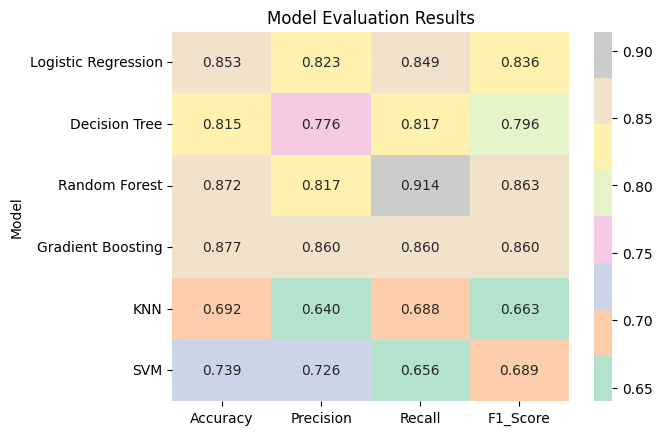

In [59]:
# Create summary table in heatmap
sns.heatmap(data=summary_table.set_index('Model').iloc[:, :], annot=True, fmt=".3f", cmap='Pastel2')
plt.title("Model Evaluation Results")
plt.show()